# Aula 2: Tarefas

Nome completo: Nelson Aloysio Reis de Almeida Passos

## 1) Utilização das Ferramentas NetworkX + Pandas

Nesta atividade vamos aprender a utilizar a ferramenta NetworkX combinada com o Pandas. 

1) Utilize os conceitos vistos na aula 2 (Notebook) para fazer processamento do arquivo de uma Rede Complexa PPI. Você deverá:
  * Ler o arquivo "BINARY_PPI.txt" da rede PPI e armazenar em um DataFrame;
  * Remover as linhas do DataFrame que não contenham informações válidas para as arestas. Ou seja, filtre as linhas cujas colunas 'Gene_Symbol' (0 e 3) sejam '-', por exemplo;
  * Usando o NetworkX, crie uma rede a partir deste DataFrame filtrado.
  * Exiba quantas componentes conexas a rede possui;
  * Calcule a maior componente e armazene-a em um grafo que será utilizado a partir de agora para os próximos exercícios.


#### Importar bibliotecas

In [14]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

%matplotlib inline

#### Carregar e filtrar data frame

In [2]:
df = pd.read_csv('BINARY_PPI.txt', delimiter='\t', header=None)
rows = df[(df[0] == '-') | (df[3] == '-')].index.to_list()
old_shape = df.shape
df.drop(rows, inplace=True)
print('Old:', old_shape, '\nNew:', df.shape)

Old: (39240, 8) 
New: (39042, 8)


#### Gerar grafo da rede

In [3]:
G = nx.Graph()

for r in range(0,len(df)):
    u = df.iloc[r][0]
    v = df.iloc[r][3]
    G.add_edge(u,v)

print('Edges:', len(G.edges()))

Edges: 39001


#### Componentes conexas

In [4]:
Graphs = list(nx.connected_component_subgraphs(G))
print("Clusters:", len(Graphs))

Clusters: 265


#### Gerar subgrafo do maior componente

In [5]:
top_graphs = []

for i,graph in enumerate(Graphs):
    #print('Cluster %d: %d edges' % (i, graph.size()))
    top_graphs.append([graph, graph.size()])

top_graphs.sort(key=lambda x:x[1], reverse=True)
SG = top_graphs[0][0]

2) Calculando informações sobre conectividade e grau dos nós:
* Calcule os graus dos nós da rede;
* Crie uma DataFrame no Pandas contendo as colunas 'Nó' e 'Grau' e ordene o DataFrame pelo Grau, seguido do Nó (ou Seja, Nós com o mesmo grau são ordenados alfabeticamente).
* Salve o DataFrame contendo os Nós e Graus.

In [6]:
deg = nx.degree_centrality(SG)

dfnodes = pd.DataFrame.from_dict(deg, orient='index', columns=['Grau'])
dfnodes.sort_values('Grau', ascending=False, inplace=True)

dfnodes['Nó'] = dfnodes.index
dfnodes.index = pd.RangeIndex(len(dfnodes))

dfnodes.to_csv('degree.csv', index=False)

3) Crie uma função para exibir as informações estatísticas sobre a rede:
* ordem;
* tamanho;
* diâmetro;
* grau médio;
* percentis do grau (10%, 25%, 50%, 75%, 90%);
* histograma do grau.

Em seguida, aplique-a para última a rede calculada (a maior componente conexa). 

In [7]:
def InformacoesRede(G, title="Histograma do Grau da Rede"):
    deg = sorted([d for n, d in G.degree()], reverse=True)
    pdeg = pd.Series(deg)
    order = G.order()
    size = G.size()
    diameter = nx.diameter(G)
    avgdegree = pdeg.sum()/order
    p10 = pdeg.quantile(0.1) # 10% percentile
    p25 = pdeg.quantile(0.25) # first quartile
    p50 = pdeg.quantile(0.5) # same as median
    p75 = pdeg.quantile(0.75) # last quartile
    p90 = pdeg.quantile(0.9) # 90% percentile
    print('Ordem:', order,
          '\nTamanho:', size,
          '\nDiâmetro:', diameter,
          '\nGrau médio:', avgdegree,
          '\nPercentil 10%:', p10,
          '\nPercentil 25%:', p25,
          '\nPercentil 50%:', p50,
          '\nPercentil 75%:', p75,
          '\nPercentil 90%:', p90)
    degree_count = collections.Counter(deg)
    deg, cnt = zip(*degree_count.items())
    fig, ax = plt.subplots(figsize=(10,6))
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title(title)
    plt.ylabel("Nós")
    plt.xlabel("Grau")
    ax.set_xticks([d for d in deg])
    ax.set_xticklabels(d for d in deg)
    plt.plot()

Ordem: 9205 
Tamanho: 38658 
Diâmetro: 14 
Grau médio: 8.399348180336773 
Percentil 10%: 1.0 
Percentil 25%: 2.0 
Percentil 50%: 4.0 
Percentil 75%: 9.0 
Percentil 90%: 19.0


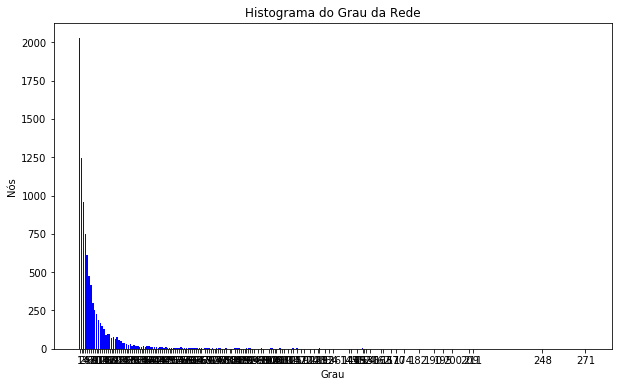

In [8]:
InformacoesRede(SG)

4) Calculando subgrafos induzidos a partir de um conjunto de nós. Para gerar os subgrafos / subredes, utilize os TOP (nós de maior grau) e armazene-os em diferentes variáveis:

* primeiros 50 nós de maior grau
* primeiros 250 nós de maior grau
* primeiros 500 nós de maior grau
* primeiros 1000 nós de maior grau

In [9]:
def GetSubgraph(G, n=100):
    deg = G.degree()
    dict_deg = dict(deg)
    df_deg = pd.DataFrame.from_dict(dict_deg, orient='index')
    df_deg_sorted = df_deg.sort_values(0, ascending=False)
    hubs = df_deg_sorted.head(n)
    array = list(hubs[0].keys())
    SG = G.subgraph(array)
    return SG

In [10]:
top_50 = GetSubgraph(SG, 50)
top_250 = GetSubgraph(SG, 250)
top_500 = GetSubgraph(SG, 500)
top_1000 = GetSubgraph(SG, 1000)

5) Para as subredes (TOP 50, 250, 500 e 1000) obtidas no exercício 4:
* imprima quais são conexas
* Para as subredes que NÃO são conexas, calcule e imprima quantas componentes existem na rede e obtenha a maior componente.
* utilizando a função desenvolvida no item 3, imprima as informações das subredes (utilizando as maiores componentes nos casos das subredes não conexas). 


In [12]:
subgraphs = []

for g in [top_50, top_250, top_500, top_1000]:
    Graphs = list(nx.connected_component_subgraphs(g))
    
    if len(Graphs) == 1:
        print('Top', len(g.nodes()), 'nodes: fully connected')
        subgraphs.append(g)
    
    else: # tem subcomponentes
        top_graphs = []
    
        for i,graph in enumerate(Graphs):
            top_graphs.append([graph, graph.size()])
        
        top_graphs.sort(key=lambda x:x[1], reverse=True)
        sg = top_graphs[0][0]
        subgraphs.append(sg)        
        
        print('Top', len(g.nodes()), 'nodes:', len(Graphs),
              'clusters (largest:', len(sg.nodes()), 'nodes)')

Top 50 nodes: 2 clusters (largest: 49 nodes)
Top 250 nodes: fully connected
Top 500 nodes: fully connected
Top 1000 nodes: fully connected



=> Top 49 nodes
Ordem: 49 
Tamanho: 304 
Diâmetro: 5 
Grau médio: 12.408163265306122 
Percentil 10%: 6.0 
Percentil 25%: 9.0 
Percentil 50%: 12.0 
Percentil 75%: 17.0 
Percentil 90%: 18.200000000000003

=> Top 250 nodes
Ordem: 250 
Tamanho: 2376 
Diâmetro: 5 
Grau médio: 19.008 
Percentil 10%: 6.0 
Percentil 25%: 10.0 
Percentil 50%: 16.5 
Percentil 75%: 25.0 
Percentil 90%: 34.099999999999994

=> Top 500 nodes
Ordem: 500 
Tamanho: 5090 
Diâmetro: 7 
Grau médio: 20.36 
Percentil 10%: 7.900000000000006 
Percentil 25%: 11.0 
Percentil 50%: 17.0 
Percentil 75%: 25.0 
Percentil 90%: 37.10000000000002

=> Top 1000 nodes
Ordem: 1000 
Tamanho: 9950 
Diâmetro: 6 
Grau médio: 19.9 
Percentil 10%: 8.0 
Percentil 25%: 11.0 
Percentil 50%: 15.0 
Percentil 75%: 23.0 
Percentil 90%: 37.10000000000002


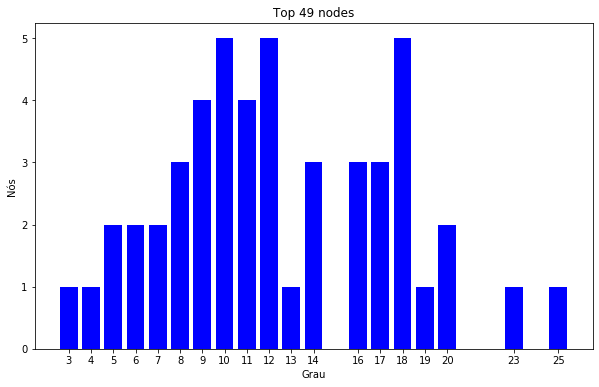

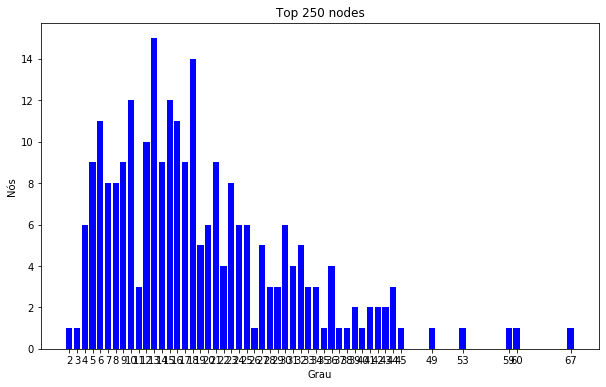

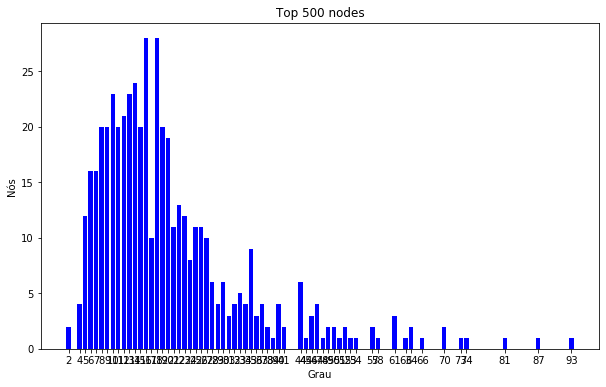

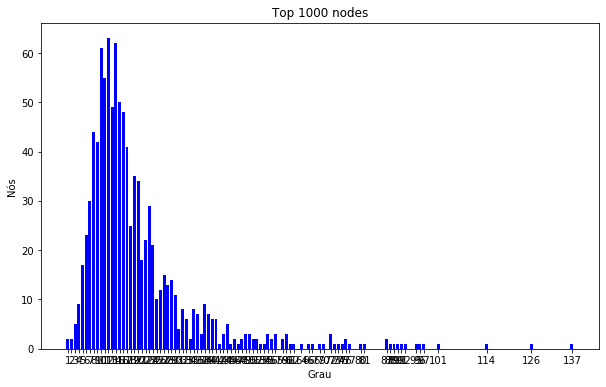

In [16]:
for g in subgraphs:
    title = str('Top ' + str(len(g.nodes())) + ' nodes')
    print('\n=>', title)
    InformacoesRede(g, title=title)

## Cytoscape 

3) Utilizar a rede dos TOP 250 para salvar em dois arquivos (um com as arestas e outro com os nós+Grau). Utilize os arquivos gerados como entrada para o Cytoscape. A rede, de ordem 250, deverá conter os seguintes requisitos:
  * Exibir o tamanho dos nós proporcional ao grau.
  * Exibir o tamanho das arestas proporcional à média dos graus do par.

In [39]:
deg = nx.degree_centrality(top_250)

dfnodes250 = pd.DataFrame.from_dict(deg, orient='index', columns=['degree'])
dfnodes250.sort_values('degree', ascending=False, inplace=True)

dfnodes250['name'] = dfnodes250.index
dfnodes250.index = pd.RangeIndex(len(dfnodes250))

dfnodes250.to_csv('top250_degree.csv', index=False)

In [40]:
with open('top250_edges.txt', 'w') as f:
    f.write('source\ttarget\n')
    for u,v in top_250.edges():
        f.write(u+'\t'+v+'\n')

#### Referências

* https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html